# Smoke Detection Dataset
Detect smoke with the help of IOT data and trigger a fire alarm.

In [248]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# reading  dataset
df = pd.read_csv('smoke_detection_iot.csv')

In [250]:
df.shape

(62630, 16)

**there are 62630 rows and 16 columns in dataset**

In [251]:
df.head()

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  \
0           0  1654733331          20.000        57.36          0        400   
1           1  1654733332          20.015        56.67          0        400   
2           2  1654733333          20.029        55.96          0        400   
3           3  1654733334          20.044        55.28          0        400   
4           4  1654733335          20.059        54.69          0        400   

   Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  CNT  \
0   12306        18520        939.735    0.0    0.0    0.0    0.0    0.0    0   
1   12345        18651        939.744    0.0    0.0    0.0    0.0    0.0    1   
2   12374        18764        939.738    0.0    0.0    0.0    0.0    0.0    2   
3   12390        18849        939.736    0.0    0.0    0.0    0.0    0.0    3   
4   12403        18921        939.744    0.0    0.0    0.0    0.0    0.0    4   

   Fire Alarm  
0           0  
1           0  
2           0  
3           0  
4           0

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [253]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

* there are no null values in the dataset

# Data Cleaning
* Unnamed: 0,UTC and CNT can be deleted as they don't have much necessity in eda

In [254]:
df = df.drop(columns=['Unnamed: 0', 'UTC', 'CNT'])

##  checking bias in dataset

In [255]:
# depedent variable analysis
df['Fire Alarm'].value_counts(normalize = True)*100

1    71.462558
0    28.537442
Name: Fire Alarm, dtype: float64

Text(0.5, 1.0, 'Checking bias in dataset')

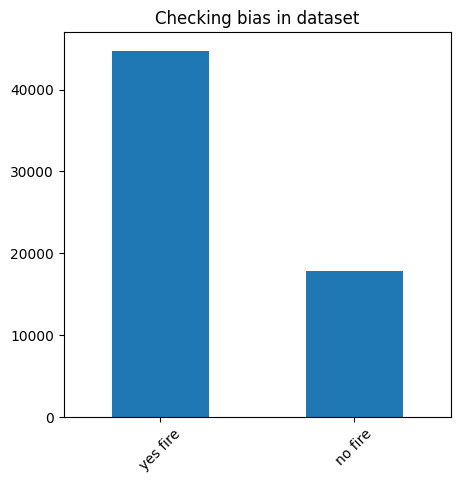

In [256]:
df['Fire Alarm'].value_counts().plot(kind ='bar')

plt.xticks(ticks = [0,1],labels=['yes fire','no fire'], rotation=45)
plt.title('Checking bias in dataset')

* **most of the data took were during fire yes condition hence biasness in data needs to be took care during training**

**analysing independent variables**

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

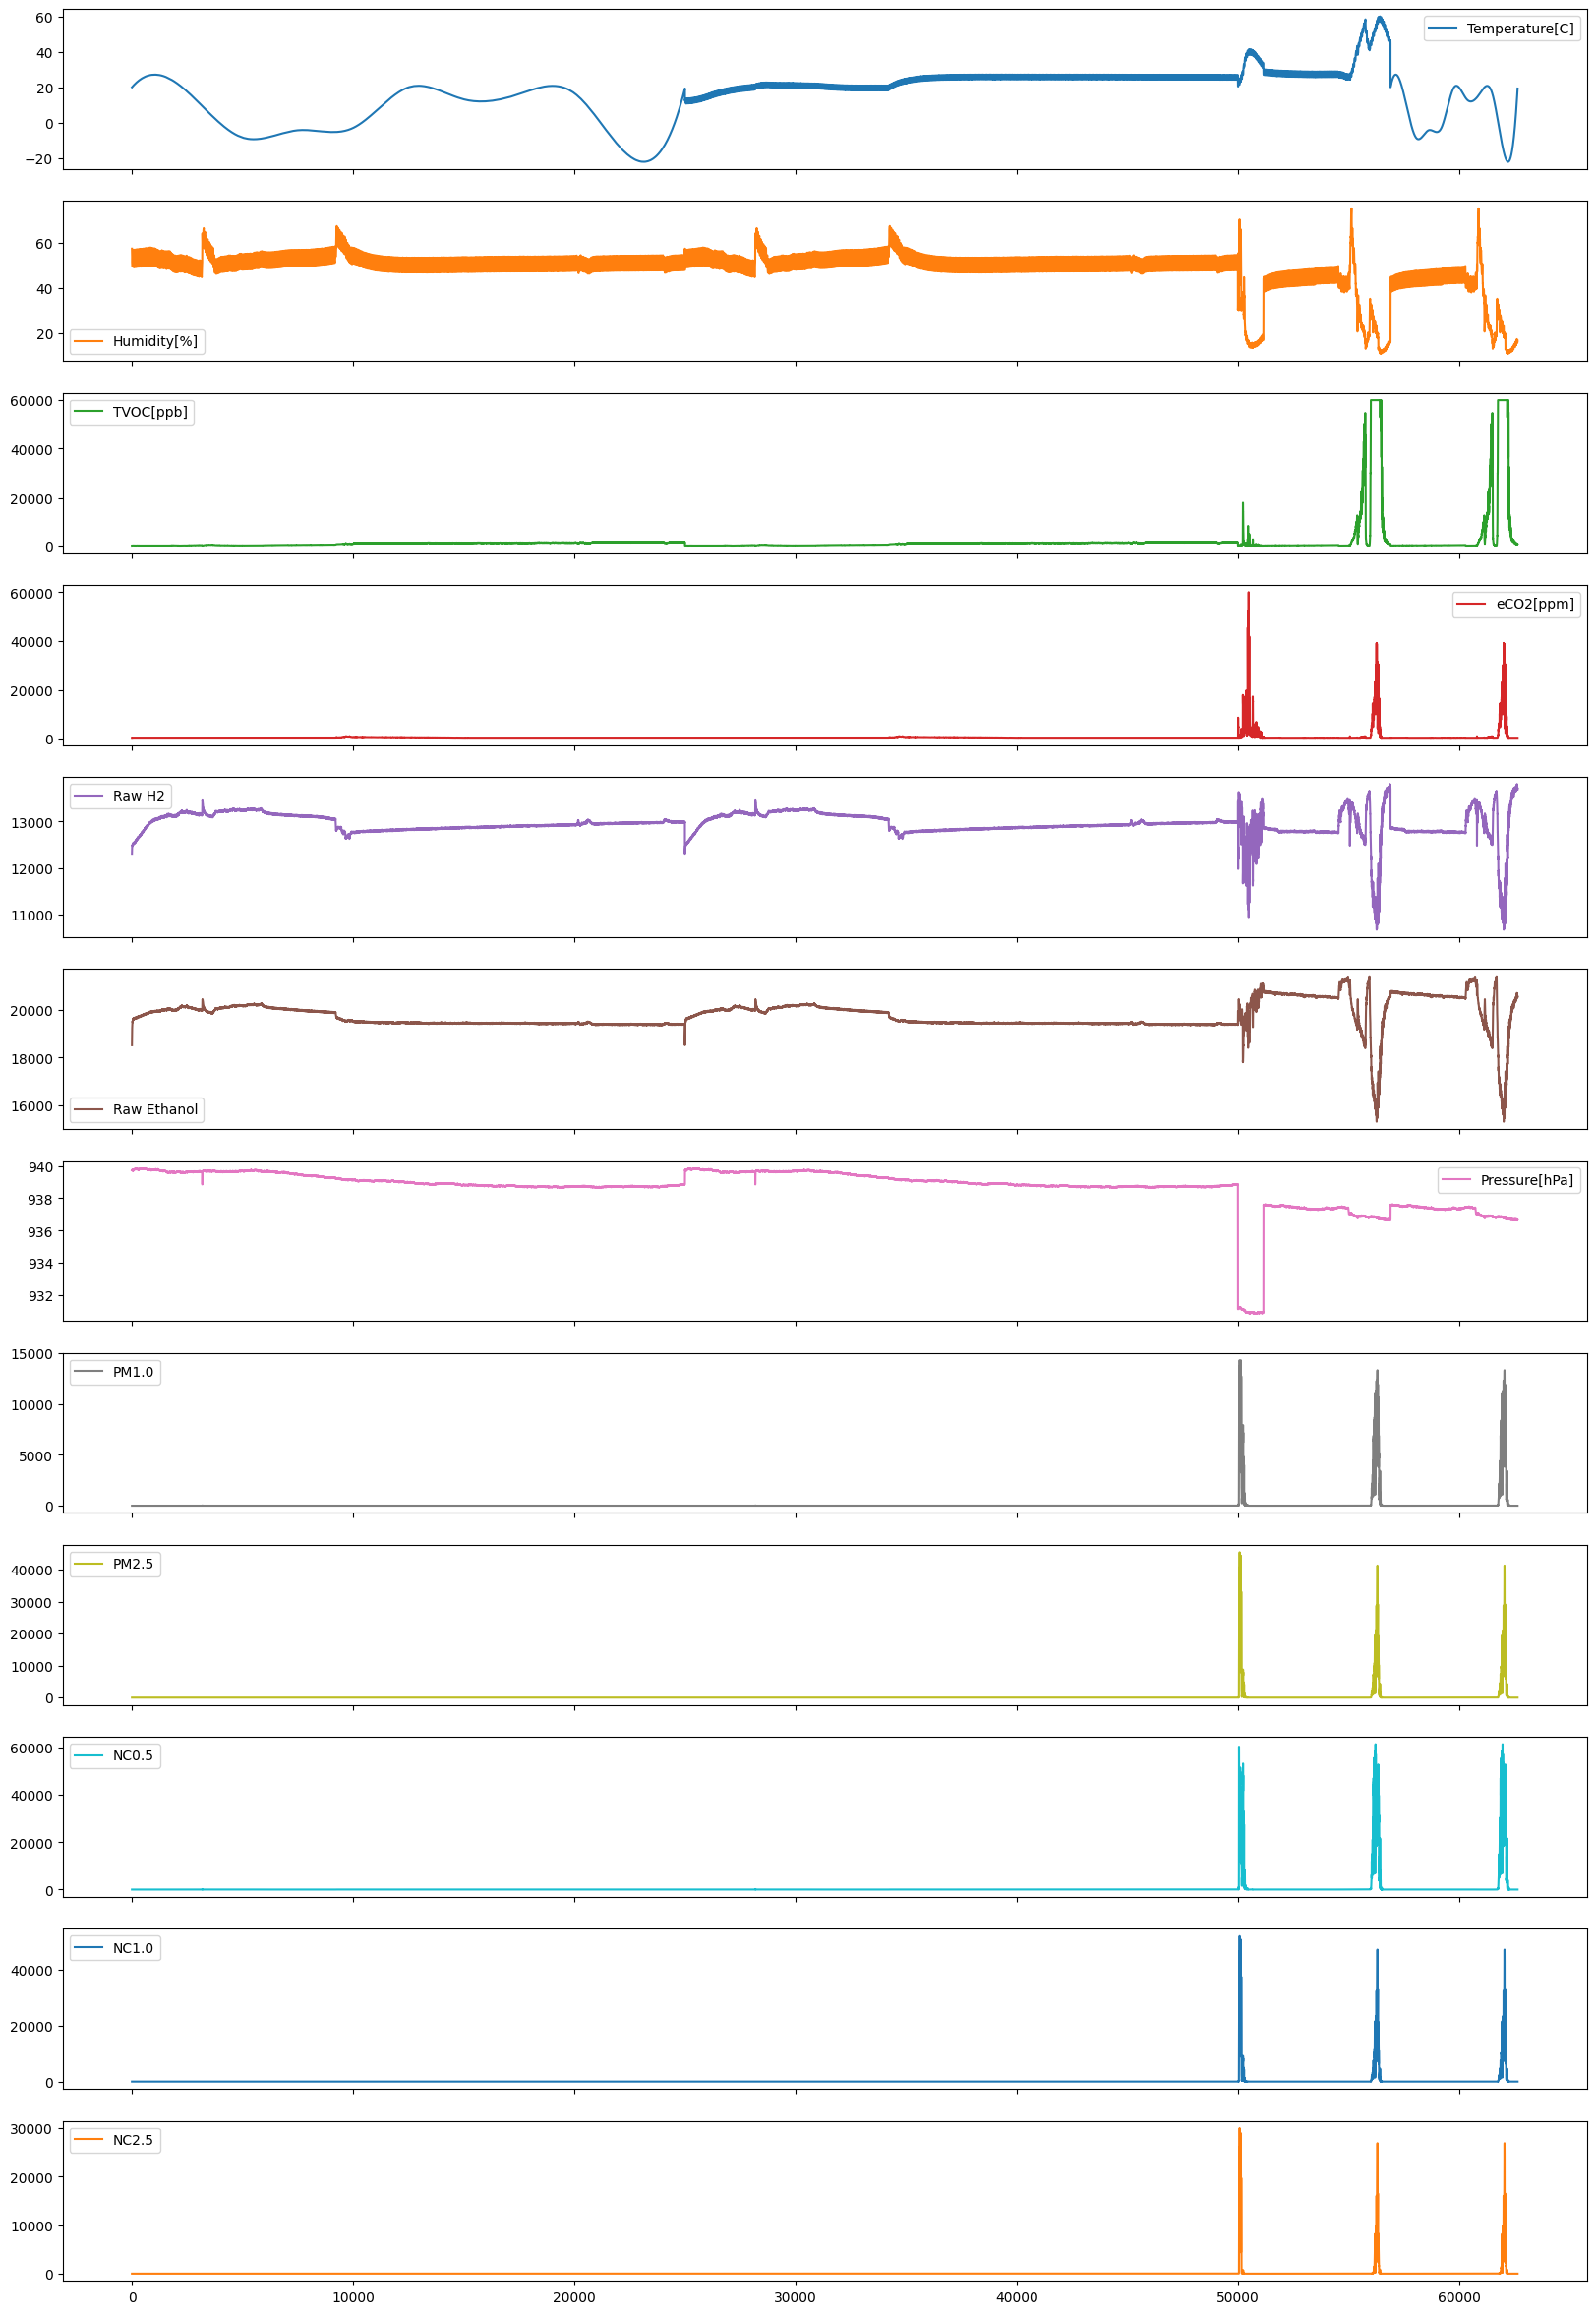

In [257]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,30

df[['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']].plot(subplots = True)

* **from the above graph strong direct and strong inverse relationship is found between the variables**
* **lets clarify it by using correlation**

Text(0.5, 1.0, 'Checking correlation within features')

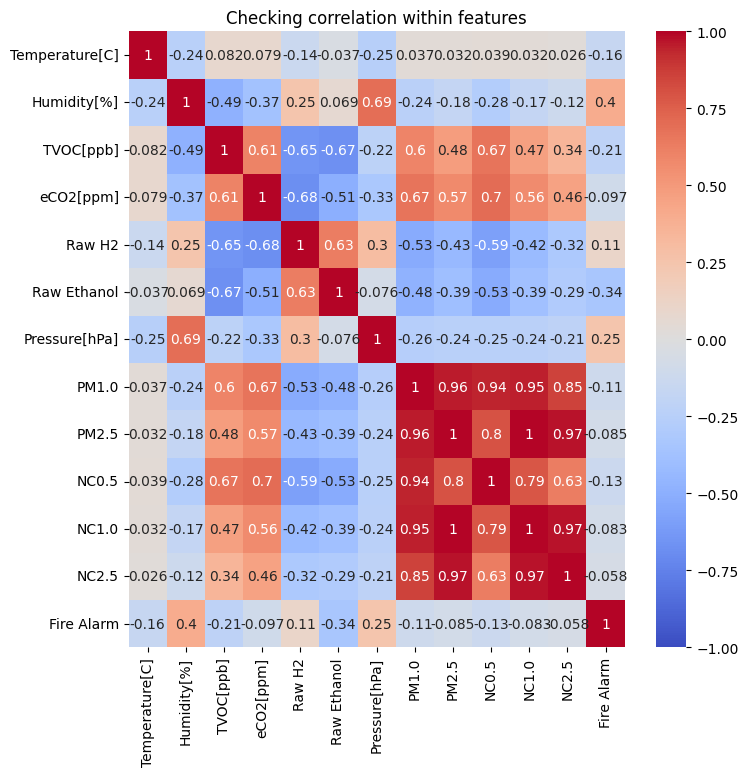

In [258]:
rcParams['figure.figsize'] = 8,8
sns.heatmap(df.corr(),annot = True, vmin =-1,cmap = 'coolwarm')
plt.title('Checking correlation within features')

* Above graph visualises **strong positive correlation between concentration of  PM1.0, PM2.5, NC0.5, NC2.5** hence we can use PM1.0 only and delete rest of them for further analysis to avoid **multicollinearity effect**

In [259]:
df = df.drop(columns=['PM2.5', 'NC0.5', 'NC1.0', 'NC2.5'])
df.head()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
0          20.000        57.36          0        400   12306        18520   
1          20.015        56.67          0        400   12345        18651   
2          20.029        55.96          0        400   12374        18764   
3          20.044        55.28          0        400   12390        18849   
4          20.059        54.69          0        400   12403        18921   

   Pressure[hPa]  PM1.0  Fire Alarm  
0        939.735    0.0           0  
1        939.744    0.0           0  
2        939.738    0.0           0  
3        939.736    0.0           0  
4        939.744    0.0           0

# EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

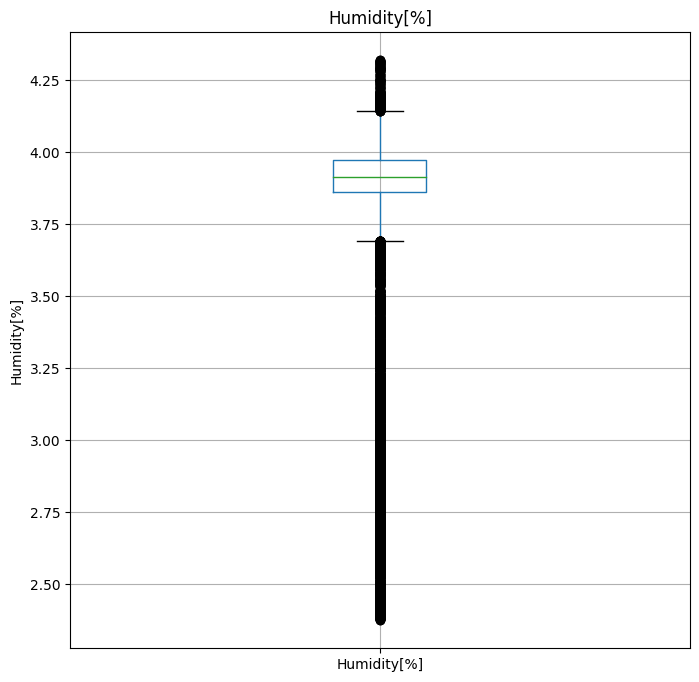

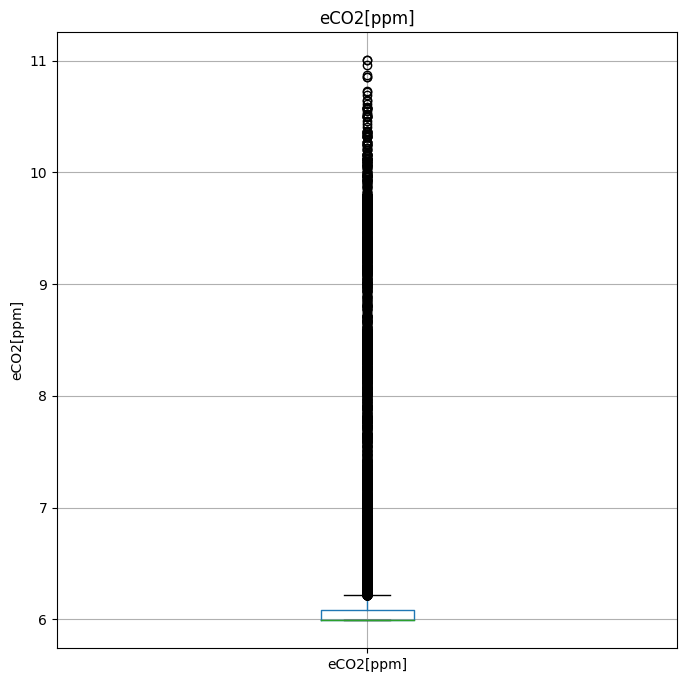

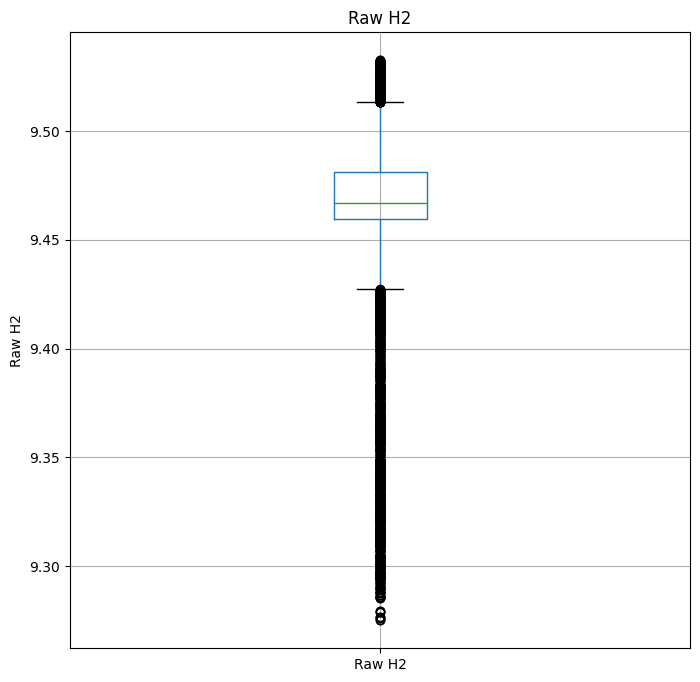

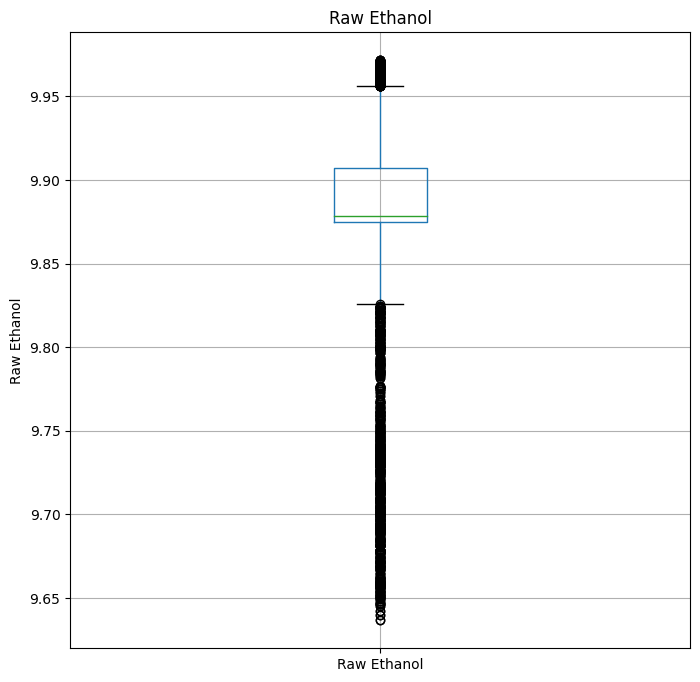

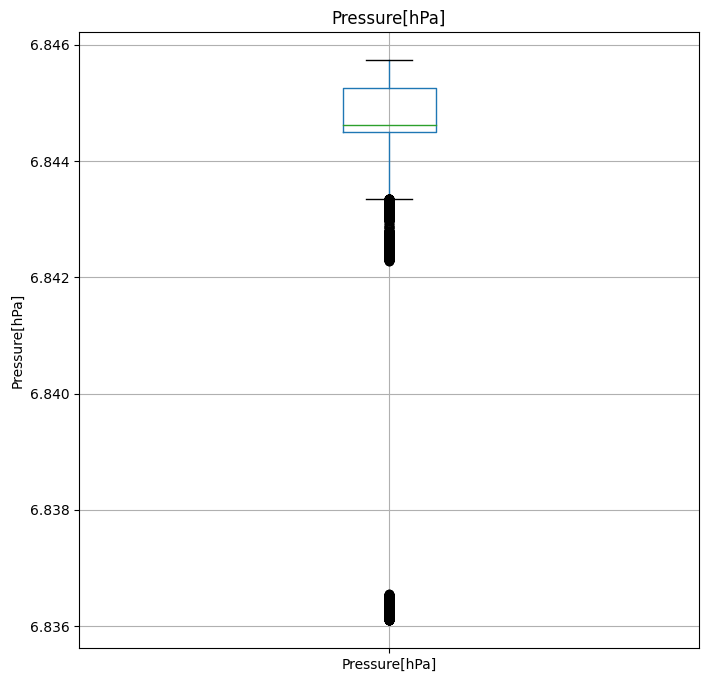

In [260]:
for feature in df.columns[:-1]:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column= feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

* **by looking at the consistency in outlier values it can be interpretted that they are not because of any human error while calculating thus it would be better if we scaled the values and then anlyse**

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Temperature vs fire density')

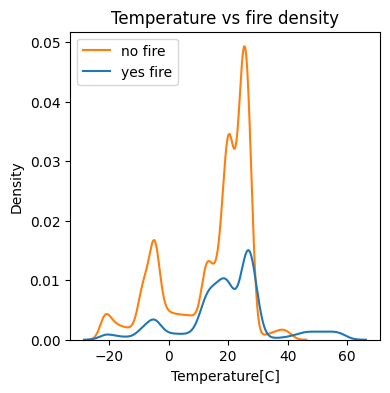

In [261]:
rcParams['figure.figsize'] = 4,4
sns.kdeplot( data=df, x='Temperature[C]', hue='Fire Alarm')
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Temperature vs fire density')

* **At diffrent temperatures yes fire may have higher density over no fire, but considering biasness towards yes fire in the 
datset nothing much can be concluded about relationship between temperature and fire alarm**

Text(0.5, 1.0, 'Humidity vs fire density')

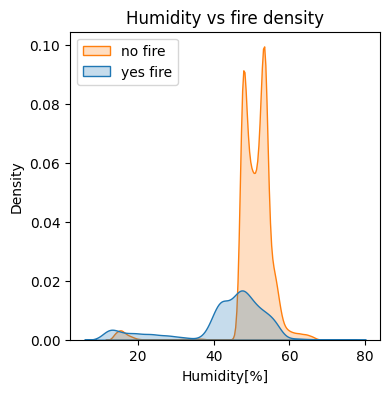

In [262]:
sns.kdeplot( data=df, x='Humidity[%]', hue='Fire Alarm',fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Humidity vs fire density')

* **From visualisation of above graph it can be analysed that yes alarm are liekly to be at high humid conditions**

Text(0.5, 1.0, 'Pressure vs fire density')

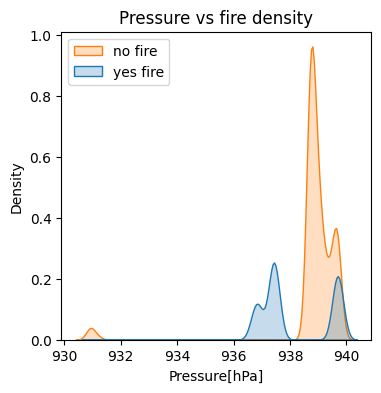

In [263]:
sns.kdeplot( data=df, x='Pressure[hPa]', hue='Fire Alarm',fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Pressure vs fire density')

* **From visualisation of above graph it can be analysed that high pressure and low presure conditions are likely conditions for yes fire**

Text(0.5, 1.0, 'Total volatile compounds vs fire density')

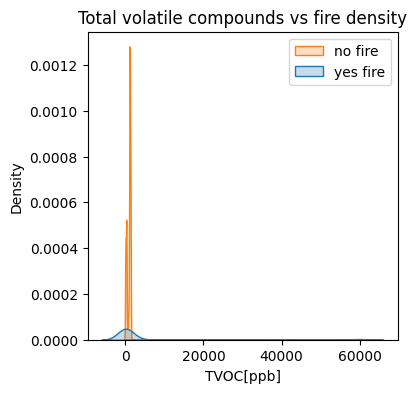

In [264]:
sns.kdeplot( data=df, x='TVOC[ppb]', hue='Fire Alarm',fill = True)
plt.legend(loc='upper right', labels=['no fire', 'yes fire'])
plt.title('Total volatile compounds vs fire density')

In [265]:
filt =df[df['TVOC[ppb]']<5000]

Text(0.5, 1.0, 'Total volatile compounds within range of 5000ppb vs fire density')

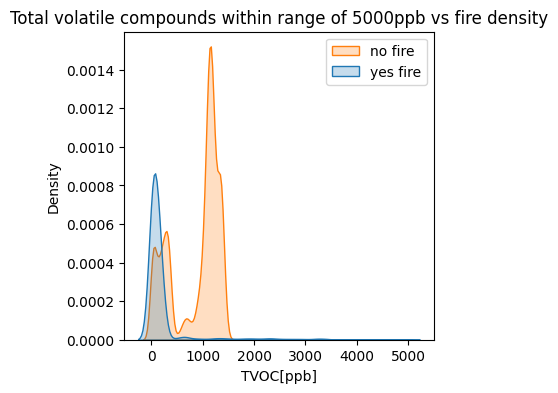

In [266]:
sns.kdeplot( data=filt, x='TVOC[ppb]', hue='Fire Alarm',fill = True)
plt.legend(loc='upper right', labels=['no fire', 'yes fire'])
plt.title('Total volatile compounds within range of 5000ppb vs fire density')

* **From visualisation of above graph it can be analysed density yes fire is are highest when Total Volatile Organic Compounds concetration is about 1000 to 1500 and at higher concentration of TVOC spread of density of yes fire and no fire is almost same**

Text(0.5, 1.0, 'Raw Hydrogen vs fire density')

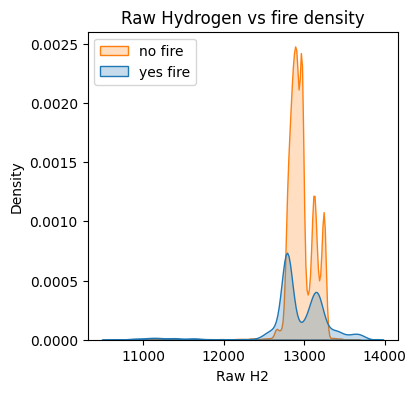

In [267]:
sns.kdeplot( data=df, x='Raw H2', hue='Fire Alarm',fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Raw Hydrogen vs fire density')

* **From visualisation of above graph it can be analysed that high density of yes fire and no fire are at similiar Raw HYDROGEN concentration hence nothing much can be infered through it**

Text(0.5, 1.0, 'Raw ethanol vs fire density')

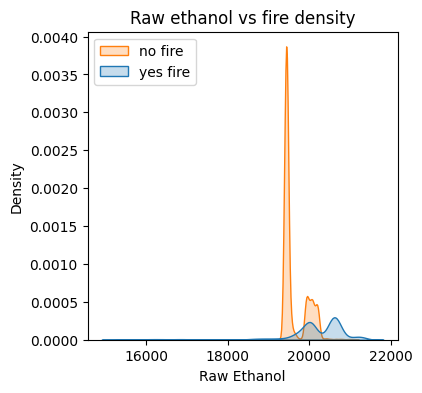

In [268]:
sns.kdeplot( data=df, x='Raw Ethanol', hue='Fire Alarm',fill = True)
plt.legend(loc='upper left', labels=['no fire', 'yes fire'])
plt.title('Raw ethanol vs fire density')

* **From visualisation of above graph it can be analysed that high density of yes fire likely to be higher when raw ethanol is 19500 to 20500 and no fire are likely to be at 20000 and above conditions**


C:\Users\91725\AppData\Local\Temp\ipykernel_9620\1200463717.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Fire Alarm'])['PM1.0','eCO2[ppm]'].mean().plot(kind = 'bar')


Text(0.5, 1.0, 'Mean concentration of PM1.0 and eCO2[ppm] ')

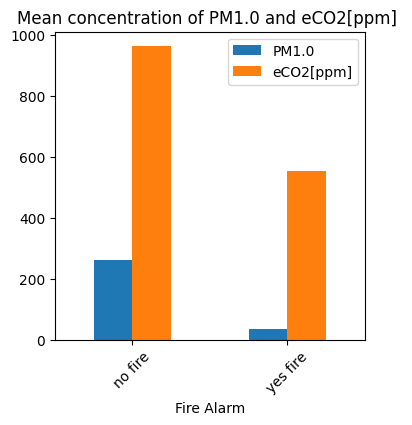

In [269]:
df.groupby(['Fire Alarm'])['PM1.0','eCO2[ppm]'].mean().plot(kind = 'bar')

plt.xticks(ticks = [0,1],labels=['no fire','yes fire'], rotation=45)
plt.title('Mean concentration of PM1.0 and eCO2[ppm] ')

* **during no fire cases average value of concetration of PM1.0 and eCO2 are pretty higher**

# MODEL BUILDING

### Splitting dependent and independent variable

In [270]:
y = df['Fire Alarm']
X = df.drop(columns=['Fire Alarm'])

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
# splitting train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,random_state =42 )

In [273]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46972, 8), (15658, 8), (46972,), (15658,))

In [274]:
y_train.value_counts(normalize=True)*100

1    71.549008
0    28.450992
Name: Fire Alarm, dtype: float64

In [275]:
# in the train data 71.5% data is yes fire and 28.5% values is no fire hence we have take care of this by assiging proper class weights

**scaling data using min max scaler**

In [276]:
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler()
scaled_data.fit(X_train)
X_train = scaled_data.transform(X_train)
X_test = scaled_data.transform(X_test)

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [278]:
import time

In [279]:
models = {
                         "DecisionTree":DecisionTreeClassifier(class_weight={0:0.7,1:0.3}),
                   "LogisticRegression": LogisticRegression(max_iter=500,class_weight={0:0.7,1:0.3}),
                                  "KNN": KNeighborsClassifier(n_neighbors=5),
                        "gradientboost": GradientBoostingClassifier(n_estimators=100, random_state=42),
                          "naive_bayes": GaussianNB(),
                         "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42,class_weight={0:0.7,1:0.3})
}

# class_weight is used to deal with imbalanced dataset by giving higher weightage to minor class
train_time = []
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train) # TRAINING
    end = time.time()
    train_time.append(end-start)
    print(name + " trained.")

DecisionTree trained.
LogisticRegression trained.
KNN trained.
gradientboost trained.
naive_bayes trained.
RandomForest trained.


### Evatuation of  ML model

In [280]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score, recall_score, f1_score, roc_auc_score

DecisionTree report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4509
           1       1.00      1.00      1.00     11149

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



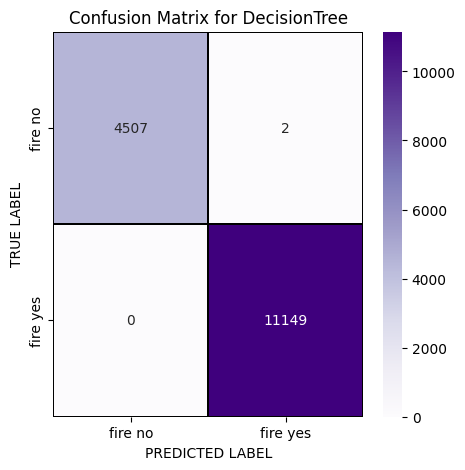

LogisticRegression report: 

               precision    recall  f1-score   support

           0       0.78      0.88      0.83      4509
           1       0.95      0.90      0.92     11149

    accuracy                           0.89     15658
   macro avg       0.87      0.89      0.88     15658
weighted avg       0.90      0.89      0.90     15658



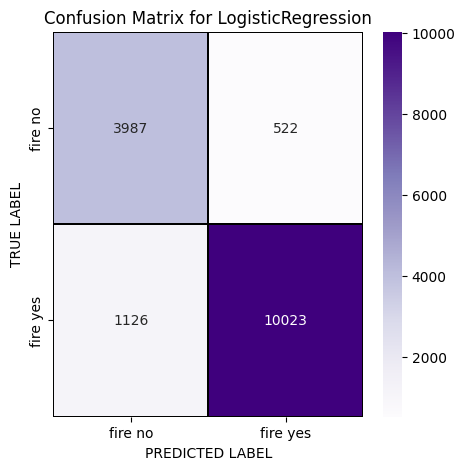

KNN report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4509
           1       1.00      1.00      1.00     11149

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



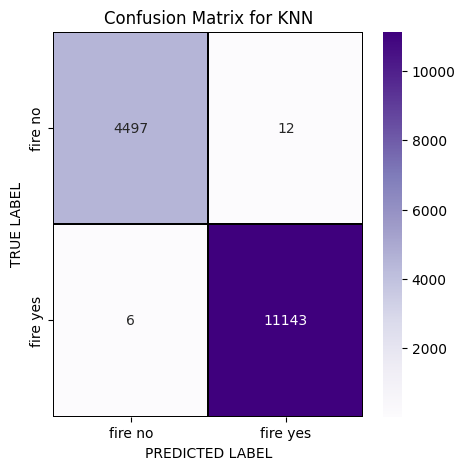

gradientboost report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4509
           1       1.00      1.00      1.00     11149

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



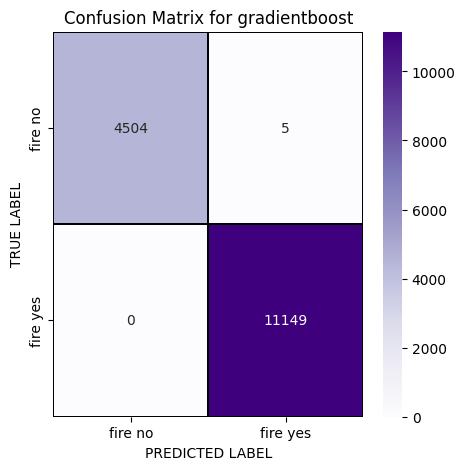

naive_bayes report: 

               precision    recall  f1-score   support

           0       0.85      0.34      0.49      4509
           1       0.79      0.97      0.87     11149

    accuracy                           0.79     15658
   macro avg       0.82      0.66      0.68     15658
weighted avg       0.80      0.79      0.76     15658



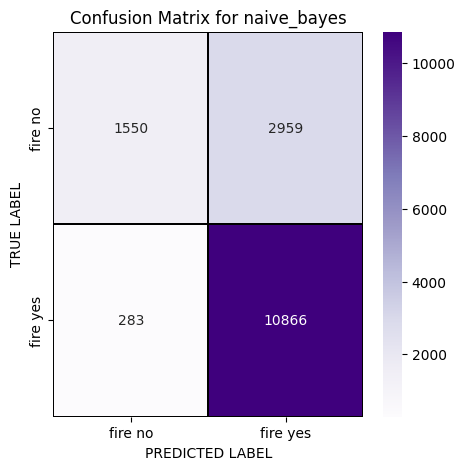

RandomForest report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4509
           1       1.00      1.00      1.00     11149

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



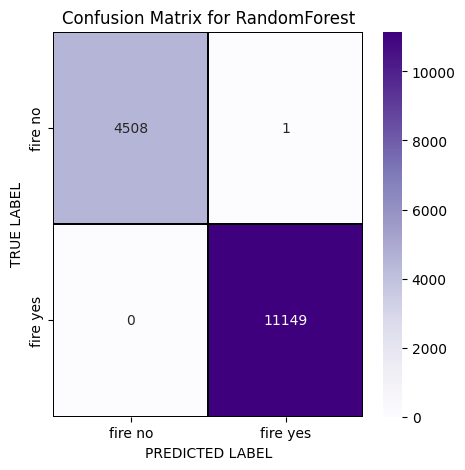

In [281]:
accuracy__score = []
precision__score= []
recall__score= []
f1__score = []
roc_auc = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob_pred = model.predict_proba(X_test)[:, 1]
    print(f"{name} report: \n\n", classification_report(y_test, y_pred))
    

    accuracy__score.append(accuracy_score(y_test, y_pred))
    

    precision__score.append(precision_score(y_test, y_pred))
    

    recall__score.append(recall_score(y_test, y_pred))
    

    f1__score.append(f1_score(y_test, y_pred))
    

    roc_auc.append( roc_auc_score(y_test, y_prob_pred))    
    
    
    cm = confusion_matrix(y_test, y_pred)

    x_axis_labels = ["fire no", "fire yes"]
    y_axis_labels = ["fire no", "fire yes"]

    f, ax = plt.subplots(figsize =(5,5))
    sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.title(f'Confusion Matrix for {name}')

    plt.show()


In [282]:
metrics_data= pd.DataFrame(models.keys(), columns=['Model'], index= range(len(models)))

In [283]:
metrics_data

Model
0        DecisionTree
1  LogisticRegression
2                 KNN
3       gradientboost
4         naive_bayes
5        RandomForest

In [284]:
metrics_data.insert(1, 'acc_score', accuracy__score)
metrics_data.insert(2, 'pre_score', precision__score)
metrics_data.insert(3, 'recall', recall__score)
metrics_data.insert(4, 'f1', f1__score)
metrics_data.insert(5, 'roc_auc', roc_auc)

In [285]:
metrics_data.insert(6, 'time', train_time)

In [286]:
metrics_data

Model  acc_score  pre_score    recall        f1   roc_auc  \
0        DecisionTree   0.999872   0.999821  1.000000  0.999910  0.999778   
1  LogisticRegression   0.894750   0.950498  0.899004  0.924034  0.947515   
2                 KNN   0.998850   0.998924  0.999462  0.999193  0.999839   
3       gradientboost   0.999681   0.999552  1.000000  0.999776  0.999999   
4         naive_bayes   0.792949   0.785967  0.974617  0.870185  0.936867   
5        RandomForest   0.999936   0.999910  1.000000  0.999955  1.000000   

        time  
0   0.304650  
1   0.329952  
2   0.478477  
3  21.133464  
4   0.029663  
5   8.949192

([<matplotlib.axis.XTick at 0x1bd05f933d0>,
 [Text(0, 0, 'DecisionTree'),
  Text(1, 0, 'LogisticRegression'),
  Text(2, 0, 'KNN'),
  Text(3, 0, 'gradientboost'),
  Text(4, 0, 'naive_bayes'),
  Text(5, 0, 'RandomForest')])

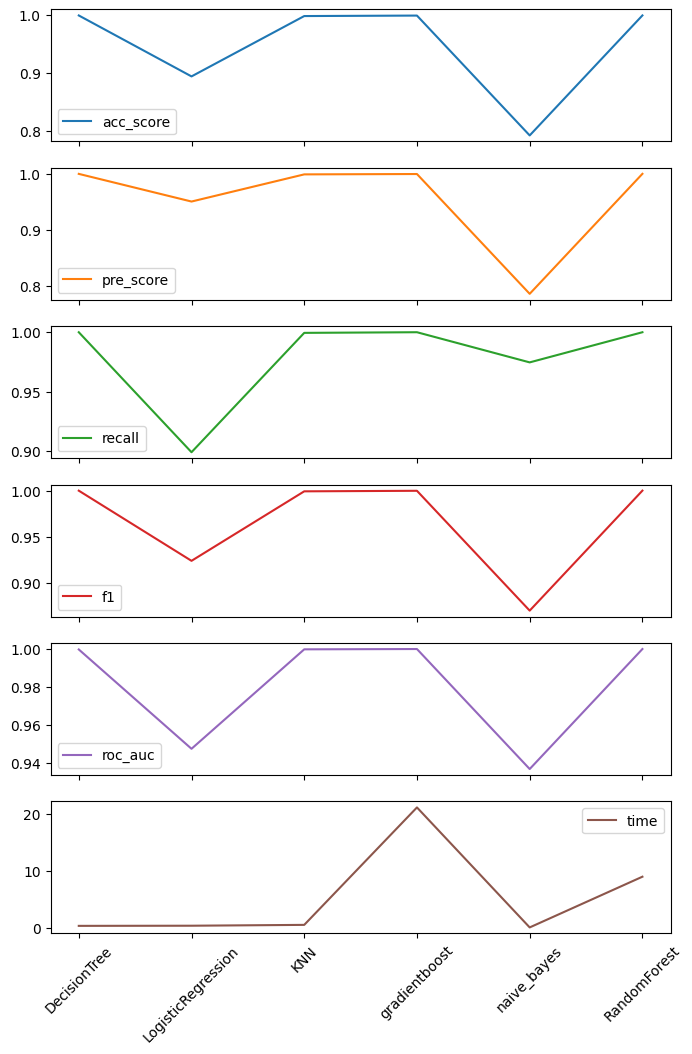

In [287]:
rcParams['figure.figsize'] = 8,12
metrics_data.iloc[:,:].plot(subplots=True)
plt.xticks(ticks = [i for i in metrics_data.index],labels=[i for i in metrics_data.Model], rotation=45)

### from above graph it is evdient that decision tree is a best model both with respect to training time and other evaluation metrices so lets move with that model

In [288]:
dt = DecisionTreeClassifier(class_weight={0:0.7,1:0.3})
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3})

In [289]:
dt.feature_importances_

array([1.43241372e-02, 2.06426239e-03, 3.28192370e-01, 6.80561683e-05,
       1.82757418e-03, 1.43926512e-02, 4.81964601e-01, 1.57166348e-01])

In [290]:
dt.get_depth()

8

# FEATURE ENGINEERING

<BarContainer object of 8 artists>

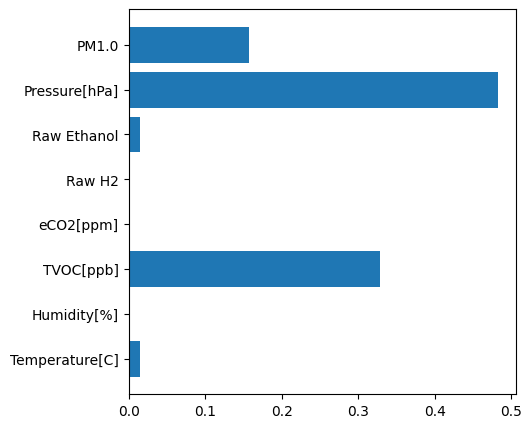

In [291]:
rcParams['figure.figsize'] =5,5
plt.barh( X.columns,dt.feature_importances_,)

* **Pressure ,total volatile compounds and particulate matter 1.0 are features with higher signifuicance determining output of fire alarm**

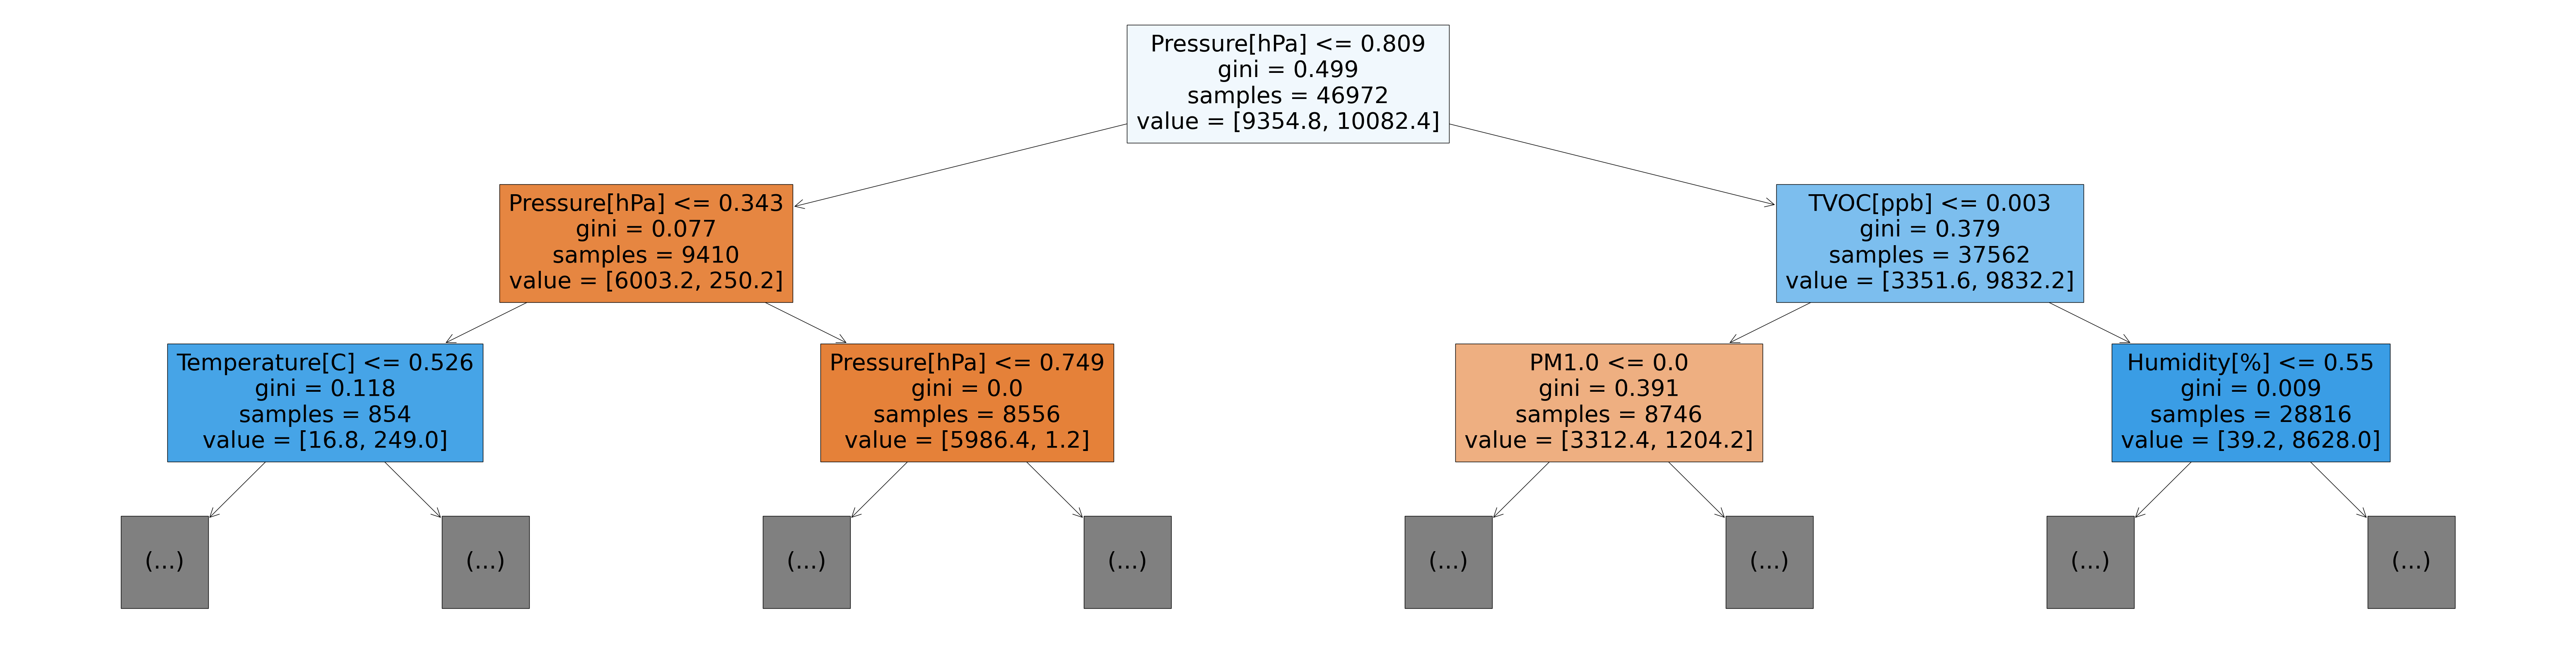

In [292]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize =(80,20))

plot_tree(dt, feature_names=X.columns, max_depth=2, filled=True);

**model has took first split with respect to pressure<=.809 (scaled pressure) and subsequently  built to reach minimum entropy stage** 

# Feature interpretation

In [293]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['no fire', 'yes fire'],
    mode='classification'
)

In [294]:
exp = interpretor.explain_instance(
    data_row=X_test[7852], ##new data
    predict_fn=dt.predict_proba
)

exp.show_in_notebook(show_table=True)

In [295]:
exp.as_list()

[('TVOC[ppb] <= 0.00', -0.48649916798558335),
 ('Pressure[hPa] > 0.95', 0.17076288353588132),
 ('0.57 < Humidity[%] <= 0.61', 0.1607854129574444),
 ('eCO2[ppm] <= 0.00', -0.015652696361773744),
 ('0.69 < Raw Ethanol <= 0.78', -0.014696361134965353),
 ('0.40 < Temperature[C] <= 0.51', -0.013561964983425379),
 ('Raw H2 > 0.78', 0.008093028229551559),
 ('PM1.0 <= 0.00', 0.005063485985583632)]

In [296]:
exp = interpretor.explain_instance(
    data_row=X_test[3179], ##new data
    predict_fn=dt.predict_proba
)

exp.show_in_notebook(show_table=True)

In [297]:
exp.as_list()

[('Humidity[%] > 0.66', 0.17588971612969792),
 ('0.88 < Pressure[hPa] <= 0.95', 0.12176242723607841),
 ('0.00 < TVOC[ppb] <= 0.02', 0.06961003667295489),
 ('Temperature[C] <= 0.40', 0.04568848385872361),
 ('0.72 < Raw H2 <= 0.78', -0.037437020365114704),
 ('0.69 < Raw Ethanol <= 0.78', -0.024070821059472967),
 ('PM1.0 <= 0.00', 0.015237858295375065),
 ('eCO2[ppm] <= 0.00', 0.0046418268569259095)]

* **for above data, features marked in blue are out of given range hence they are driving to no fire and feature mrked in orange are in given range hence drive towards yes fire**

# Conclusion

* From above analysis except NAIVE BIAS all other models performed well in all evaluation metrics,
* KNN being distance based algorithm may be biased to Yes fire because of biasness in data
* Distance Tree is best model among all when compared with respect to both training time and evaluation results
* Pressure, Total volatile compound concentration and PM1.0 concentration are significant features determioning output of fire alarm
* High correlation exists between PM1.0, PM2.5, NC0.5, NC1.0, NC2.5 concentrations